In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
df = pd.read_csv('../../Datasets/titanic_train.csv')
                 
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.shape

(891, 12)

In [4]:
# Checking for missing values
Null_vals = df.isnull().sum().sort_values(ascending=False) 

Null_vals[Null_vals > 0]

Cabin       687
Age         177
Embarked      2
dtype: int64

In [5]:
# Filling missing Age values with mean
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [6]:
# Filling missing Embarked values with most common values
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [7]:
# Filling missing Cabin values with most common values
df['Cabin'] = df['Cabin'].fillna(df['Cabin'].mode()[0])

In [8]:
df['Pclass'] = df['Pclass'].apply(str)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null object
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          891 non-null object
Embarked       891 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


In [10]:
df = pd.get_dummies(df)

df.head()

,PassengerId,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,"Name_Abbing, Mr. Anthony",...,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_C,Embarked_Q,Embarked_S
0,1,0,22.0,1,0,7.2500,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1,38.0,1,0,71.2833,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,1,26.0,0,0,7.9250,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,4,1,35.0,1,0,53.1000,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,5,0,35.0,0,0,8.0500,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [11]:
label = df.pop('Survived')

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df, label, test_size=0.25)

In [13]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [14]:
y_pred = rf.predict(X_test)

y_pred_proba = rf.predict_proba(X_test)

In [15]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1])
roc_auc = auc(fpr, tpr)

roc_auc

0.8949459093982421

In [16]:
random_prob = [0 for i in range(len(X_test))]
r_fpr, r_tpr, _ = roc_curve(y_test, random_prob)

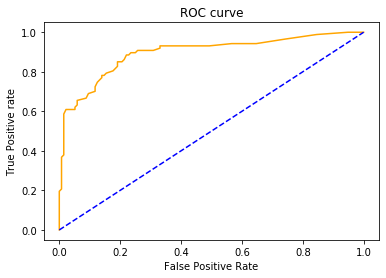

In [25]:
plt.plot(fpr, tpr, color='orange')

plt.plot(r_fpr, r_tpr, linestyle='--', color='blue')

# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.show()

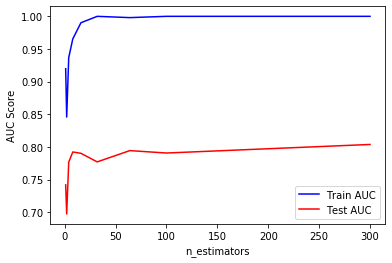

In [26]:
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 300]
train_res = []
test_res = []

for estimator in n_estimators:
    rf = RandomForestClassifier(n_estimators=estimator, n_jobs=-1)
    rf.fit(X_train, y_train)
    
    y_pred_train = rf.predict(X_train)
    y_pred_test = rf.predict(X_test)
    
    fpr, tpr, _ = roc_curve(y_train, y_pred_train)
    roc_auc = auc(fpr, tpr)
    train_res.append(roc_auc)
    
    fpr, tpr, _ = roc_curve(y_test, y_pred_test)
    roc_auc = auc(fpr, tpr)
    test_res.append(roc_auc)

plt.plot(n_estimators, train_res, color='blue', label='Train AUC')
plt.plot(n_estimators, test_res, color='red', label='Test AUC')
plt.legend(loc='best')
plt.ylabel('AUC Score')
plt.xlabel('n_estimators')
plt.show()